# $N$-Dice Problem

**(09-24-2023)**

There are three dice, each of which has six sides. One die has one side with one dot and five sides with four dots. Another die has five sides with three dots and one side with six dots. The last die has three sides with two dots and three sides with five dots. We label the die $D_1$, $D_2$, and $D_3$ respectively. 

In this game, Player 1 selects a die. Then Player 2 selects a die from the two remaining dice. In the "one-roll game," the player who rolls the highest number wins. In the "two-roll game," the player with the highest sum of two rolls wins. 


1. What is the best strategy for an $N$ roll game? What if the faces of the die are different from that stated in the prompt?  (For simplicity, you can assume they still take on two values, you should consider the six different values case as well)
2. What about the case where $N\gg1$? 

$$ \text{Prob}_N(X_{\alpha} > X_{\beta}) =  \sum_{k, \ell = 0}^N\binom{N}{k}\binom{N}{\ell} \,p_{\alpha, 1}^k \,p_{\alpha, 2}^{N-k}\, p_{\beta, 1}^{\ell}\, p_{\beta, 2}^{N-\ell}\, \Theta\left(k\Delta_{\alpha}- \ell\Delta_{\beta}, N(x_{\beta, 2}-x_{\alpha,2})\right)$$

In [454]:
from scipy.special import comb
import matplotlib.pyplot as plt
import numpy as np

### Probability Difference Function

In [455]:
# parameter definitions

# vector of values
x = np.array([[4, 1],
              [6, 3],
              [5, 2]])

# vector of probabilities
p = np.array([[5/6,1/6],
                     [1/6,5/6],
                     [1/2,1/2]])

In [480]:
# defining probability difference function
prob_diff = lambda alpha, beta, N: np.sum([[comb(N, k, exact=True)*p[alpha][0]**(k)*p[alpha][1]**(N-k)
                                            *comb(N, l, exact=True)*p[beta][0]**(l)*p[beta][1]**(N-l)
                                            *np.heaviside(k*(x[alpha,0]-x[alpha,1])-l*(x[beta,0]-x[beta,1]) 
                                                          - N*(x[beta,1]-x[alpha,1]),0) 
                                            for k in range(N+1)] 
                                           for l in range(N+1)])


In [481]:
# testing
prob_diff(alpha = 0, beta = 1, N= 1)

0.6944444444444445

### Plot of Probability as a function of N

In [458]:
# Using 0 and 1 as examples
alpha_, beta_ = 0, 1

# range of values to plot
Nf = 100

In [459]:
# range of Nvalues
Nvals = np.array([int(elem) for elem in np.linspace(1,Nf, Nf)])

# difference values for range
diff_vals = np.array([prob_diff(alpha = alpha_, beta = beta_, N = nval) for nval in Nvals])

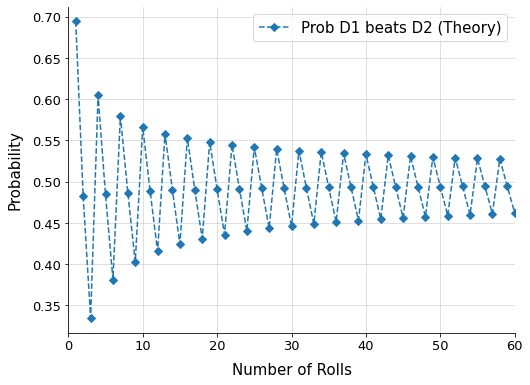

In [475]:
# plt.figure()
fig, ax = plt.subplots(figsize = (8,6))

# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)

# main plot
plt.plot(Nvals, diff_vals, 'D--', label=f'Prob D{alpha_+1} beats D{beta_+1} (Theory)')

# cleaning and visualization
plt.grid(alpha = 0.5)
plt.xlabel('Number of Rolls', fontsize = 15, labelpad = 10.1)
plt.ylabel('Probability', fontsize = 15, labelpad = 10.1)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim([0,60])
plt.legend(loc = 'best', fontsize = 15)
# plt.savefig('n_dice_rolls.png', bbox_inches = 'tight')
plt.show()

### Simulations

In [462]:
Nsim = 10000
alpha_, beta_ = 0, 1

In [463]:
def dice_simulator(alpha, beta, N, Nsim=10000, p = p, x = x):
    
    # empty list counting wins
    win_list = list()

    # running simulation 
    for k in range(Nsim):
        
        # rolling the two dice N times
        k_alpha = np.random.binomial(N, p[alpha_,0])
        k_beta = np.random.binomial(N, p[beta_,0])

        # tallying totals
        X_alpha = k_alpha*x[alpha_,0] + (N-k_alpha)*x[alpha_,1]
        X_beta = k_beta*x[beta_,0] + (N-k_beta)*x[beta_,1]

        # adding 1 if alpha beats beta
        if X_alpha > X_beta:
            win_list.append(1)
        else:
            win_list.append(0)    
    
    # gives probability that dice alpha beats dice beta
    return np.sum(win_list)/Nsim

In [464]:
# simulation of difference values
sim_diff_vals = np.array([dice_simulator(alpha=alpha_, beta=beta_, N = nval) for nval in Nvals])

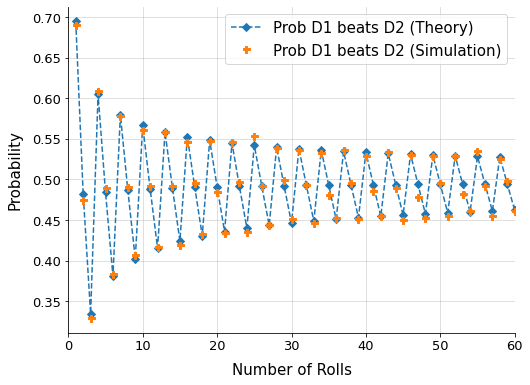

In [476]:
# plt.figure()
fig, ax = plt.subplots(figsize = (8,6))

# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)

# main plot
plt.plot(Nvals, diff_vals, 'D--', label=f'Prob D{alpha_+1} beats D{beta_+1} (Theory)')
plt.plot(Nvals, sim_diff_vals, 'P',markersize =7, label=f'Prob D{alpha_+1} beats D{beta_+1} (Simulation)')

# cleaning and visualization
plt.grid(alpha = 0.5)
plt.xlabel('Number of Rolls', fontsize = 15, labelpad = 10.1)
plt.ylabel('Probability', fontsize = 15, labelpad = 10.1)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim([0,60])
plt.legend(loc = 'best', fontsize = 15)
plt.savefig('n_dice_rolls_sim.png', bbox_inches = 'tight')
plt.show()

### Large N Limit through Contour Integrals

$$ \text{Prob}_N(X_{\alpha} > X_{\beta}) = \frac{1}{2\pi i} \oint dz \exp F_{N}(z; \hat{p}, \hat{x}) \simeq \frac{1}{\sqrt{2\pi F_{N}''(z_0; \hat{p}, \hat{x})}}\exp F_{N}(z_0; \hat{p}, \hat{x}) $$

where $\hat{p}$ is a matrix defined as `p_hat = [[p[alpha, 1], p[alpha, 2]], [p[beta,1], p[beta,2]]]` and $\hat{x}$ is defined similarly. The potential $F_{N}(z)$ is defined as 

$$ F_{N}(z; \hat{p}, \hat{x}) = \ln\left(\frac{1}{1-z}\right) + N \ln\big(p_{\alpha, 1} z^{-x_{\alpha, 1}} + p_{\alpha, 2} z^{-x_{\alpha, 2}}\big)+N \ln\big(p_{\beta, 1} z^{x_{\beta, 1}} + p_{\beta, 2} z^{x_{\beta, 2}}\big),$$

and $z_0$ is the value at which $F'_N(z; \hat{p}, \hat{x})$ is zero. 

In [482]:
# helper functions for potential
A = lambda z, N, p, x1, x2: N*np.log(p*z**x1+(1-p)*z**x2)
B = lambda z, N, p, x1, x2: N*(p*x1*z**(x1-1)+(1-p)*x2*z**(x2-1))/(p*z**x1+(1-p)*z**x2)
C = lambda z, N, p, x1, x2: N*(p*x1*(x1-1)*z**(x1-2)+(1-p)*x2*(x2-1)*z**(x2-2))/(p*z**x1+(1-p)*z**x2)-(1.0/N)*B(z, N, p, x1, x2)**2

In [483]:
## Defining potential, its first derivative, and its second derivative

FNz = lambda z, N, alpha, beta:  np.log(1/(1-z)) + A(z, N, p[alpha,0], -x[alpha,0], -x[alpha,1]) + A(z, N, p[beta,0], x[beta,0], x[beta,1])

partialFNz = lambda z, N, alpha, beta:  1.0/(1-z) + B(z, N, p[alpha_,0], -x[alpha,0], -x[alpha,1]) + B(z, N, p[beta,0], x[beta,0], x[beta,1])

partial2FNz = lambda z, N, alpha, beta:  1.0/(1-z)**2 + C(z, N, p[alpha,0], -x[alpha,0], -x[alpha,1]) + C(z, N, p[beta,0], x[beta,0], x[beta,1])

In [484]:
def largeNprob(alpha, beta, N):
    
    # finding minimum of potential
    zvals = np.linspace(0.5, 1-1e-10, 10000)
    root = zvals[np.argmin(FNz(zvals, N=N, alpha=alpha, beta=beta))]
    
    # computing probability
    prob = np.exp(FNz(root, N, alpha=alpha, beta=beta))/np.sqrt(2*np.pi*partial2FNz(root, N, alpha=alpha, beta=beta))
    
    return prob

In [485]:
# testing result
largeNprob(alpha=alpha_, beta=beta_, N=40)

0.4558641339174259

In [486]:
# large N values
largeNvals = np.array([largeNprob(alpha=alpha_, beta=beta_, N=nval) for nval in Nvals])

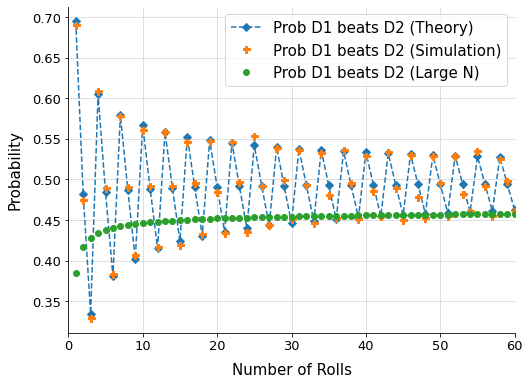

In [488]:
# plt.figure()
fig, ax = plt.subplots(figsize = (8,6))

# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)

# main plot
plt.plot(Nvals, diff_vals, 'D--', label=f'Prob D{alpha_+1} beats D{beta_+1} (Theory)')
plt.plot(Nvals, sim_diff_vals, 'P',markersize =7, label=f'Prob D{alpha_+1} beats D{beta_+1} (Simulation)')
plt.plot(Nvals, largeNvals, 'o',markersize =6, label=f'Prob D{alpha_+1} beats D{beta_+1} (Large N)')


# cleaning and visualization
plt.grid(alpha = 0.5)
plt.xlabel('Number of Rolls', fontsize = 15, labelpad = 10.1)
plt.ylabel('Probability', fontsize = 15, labelpad = 10.1)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim([0,60])
plt.legend(loc = 'best', fontsize = 15)
plt.savefig('n_dice_rolls_sim_largeN.png', bbox_inches = 'tight')
plt.show()

------

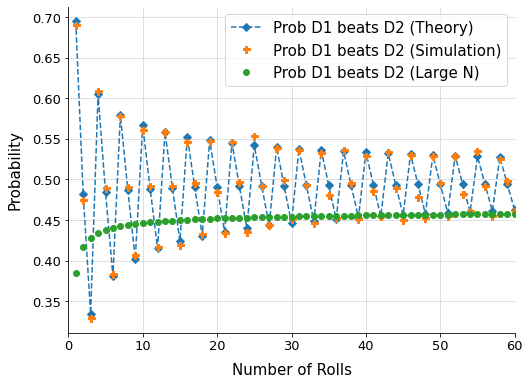

In [487]:
# plt.figure()
fig, ax = plt.subplots(figsize = (8,6))

# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)

# main plot
plt.plot(Nvals, diff_vals, 'D--', label=f'Prob D{alpha_+1} beats D{beta_+1} (Theory)')
plt.plot(Nvals, sim_diff_vals, 'P',markersize =7, label=f'Prob D{alpha_+1} beats D{beta_+1} (Simulation)')
plt.plot(Nvals, largeNvals, 'o',markersize =6, label=f'Prob D{alpha_+1} beats D{beta_+1} (Large N)')


# cleaning and visualization
plt.grid(alpha = 0.5)
plt.xlabel('Number of Rolls', fontsize = 15, labelpad = 10.1)
plt.ylabel('Probability', fontsize = 15, labelpad = 10.1)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim([0,60])
plt.legend(loc = 'best', fontsize = 15)
# plt.savefig('n_dice_rolls_sim_largeN.png', bbox_inches = 'tight')
plt.show()